In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import cm
sns.set_style('ticks')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
KD= pd.read_csv("../input/all_kaggle_datasets.csv")
KD.head()

,categories,commonFileTypes,creatorName,creatorUrl,creatorUserId,currentDatasetVersionId,currentDatasetVersionNumber,datasetId,datasetSize,datasetUrl,dateUpdated,diffType,downloadCount,forumUrl,isCollaborator,isDeleted,isFailed,isFeatured,isHidden,isPrivate,isSuperFeatured,licenseName,licenseShortName,maintainerOrganization,overview,ownerAvatarUrl,ownerName,ownerUrl,ownerUserId,scriptCount,scriptsUrl,thumbnailImageUrl,title,topicCount,type,viewCount,voteButton
0,"{'categories': [{'id': 13213, 'name': 'survey ...","[{'fileType': 'csv', 'count': 3, 'totalSize': ...",Paul Mooney,/paultimothymooney,1314380,161079,5,70947,4043536,/kaggle/kaggle-survey-2018,2018-11-03T22:35:07.12Z,unversioned,5506,/kaggle/kaggle-survey-2018/discussion,False,False,False,True,False,False,True,CC BY-SA 4.0,CC4,NaN,Explore the 2018 Kaggle ML & Data Science Surv...,https://storage.googleapis.com/kaggle-organiza...,Kaggle,/kaggle,NaN,190,/kaggle/kaggle-survey-2018/kernels,https://storage.googleapis.com/kaggle-datasets...,2018 Kaggle ML & DS Survey Challenge,12,fileset,274306,"{'totalVotes': 678, 'hasAlreadyVotedUp': False..."
1,"{'categories': [{'id': 13205, 'name': 'text mi...","[{'fileType': 'other', 'count': 20, 'totalSize...",Jason King,/jkkphys,459483,194523,1,83790,968989653,/jkkphys/english-wikipedia-articles-20170820-m...,2018-11-28T17:09:32.423Z,versioned,7,/jkkphys/english-wikipedia-articles-20170820-m...,False,False,False,True,False,False,True,CC BY-SA 3.0,CC3,NaN,Gensim models trained on English Wikipedia Art...,https://storage.googleapis.com/kaggle-avatars/...,Jason King,/jkkphys,459483.0,11,/jkkphys/english-wikipedia-articles-20170820-m...,https://storage.googleapis.com/kaggle-datasets...,English Wikipedia Articles 2017-08-20 Models,0,fileset,176,"{'totalVotes': 2, 'hasAlreadyVotedUp': False, ..."
2,"{'categories': [{'id': 11102, 'name': 'busines...","[{'fileType': 'csv', 'count': 1, 'totalSize': ...",Mehdi Dagdoug,/mehdidag,1227281,59109,1,38809,5621145,/mehdidag/black-friday,2018-07-25T20:49:48.41Z,versioned,14066,/mehdidag/black-friday/discussion,False,False,False,True,False,False,True,CC0: Public Domain,CC0,NaN,A study of sales trough consumer behaviours,https://storage.googleapis.com/kaggle-avatars/...,Mehdi Dagdoug,/mehdidag,1227281.0,40,/mehdidag/black-friday/kernels,https://storage.googleapis.com/kaggle-datasets...,Black Friday,4,fileset,80770,"{'totalVotes': 298, 'hasAlreadyVotedUp': False..."
3,"{'categories': [{'id': 1209, 'name': 'governme...","[{'fileType': 'other', 'count': 1, 'totalSize'...",Chris Crawford,/crawford,484516,150301,18,45286,45177047,/center-for-policing-equity/data-science-for-good,2018-10-29T23:55:11.713Z,unversioned,2573,/center-for-policing-equity/data-science-for-g...,False,False,False,True,False,False,True,CC0: Public Domain,CC0,NaN,How do you measure justice?,https://storage.googleapis.com/kaggle-organiza...,Center for Policing Equity,/center-for-policing-equity,NaN,54,/center-for-policing-equity/data-science-for-g...,https://storage.googleapis.com/kaggle-datasets...,Data Science for Good: Center for Policing Equity,27,fileset,52192,"{'totalVotes': 282, 'hasAlreadyVotedUp': False..."
4,"{'categories': [{'id': 2200, 'name': 'arts and...","[{'fileType': 'other', 'count': 2, 'totalSize'...",Danil,/thedownhill,1914606,36285,2,28335,609430422,/thedownhill/art-images-drawings-painting-scul...,2018-05-25T18:00:50.393Z,versioned,517,/thedownhill/art-images-drawings-painting-scul...,False,False,False,True,False,False,True,"Database: Open Database, Contents: © Original ...",ODbL,NaN,Dataset with about 9000 images containing 5 ty...,https://storage.googleapis.com/kaggle-avatars/...,Danil,/thedownhill,1914606.0,5,/thedownhill/art-images-drawings-painting-scul...,https://storage.googleapis.com/kaggle-datasets...,Art Images: Drawing/Painting/Sculptures/Engrav...,0,fileset,4086,"{'totalVotes': 42, 'hasAlreadyVotedUp': False,..."


In [3]:
KD.head().T

,0,1,2,3,4
categories,"{'categories': [{'id': 13213, 'name': 'survey ...","{'categories': [{'id': 13205, 'name': 'text mi...","{'categories': [{'id': 11102, 'name': 'busines...","{'categories': [{'id': 1209, 'name': 'governme...","{'categories': [{'id': 2200, 'name': 'arts and..."
commonFileTypes,"[{'fileType': 'csv', 'count': 3, 'totalSize': ...","[{'fileType': 'other', 'count': 20, 'totalSize...","[{'fileType': 'csv', 'count': 1, 'totalSize': ...","[{'fileType': 'other', 'count': 1, 'totalSize'...","[{'fileType': 'other', 'count': 2, 'totalSize'..."
creatorName,Paul Mooney,Jason King,Mehdi Dagdoug,Chris Crawford,Danil
creatorUrl,/paultimothymooney,/jkkphys,/mehdidag,/crawford,/thedownhill
creatorUserId,1314380,459483,1227281,484516,1914606
currentDatasetVersionId,161079,194523,59109,150301,36285
currentDatasetVersionNumber,5,1,1,18,2
datasetId,70947,83790,38809,45286,28335
datasetSize,4043536,968989653,5621145,45177047,609430422
datasetUrl,/kaggle/kaggle-survey-2018,/jkkphys/english-wikipedia-articles-20170820-m...,/mehdidag/black-friday,/center-for-policing-equity/data-science-for-good,/thedownhill/art-images-drawings-painting-scul...


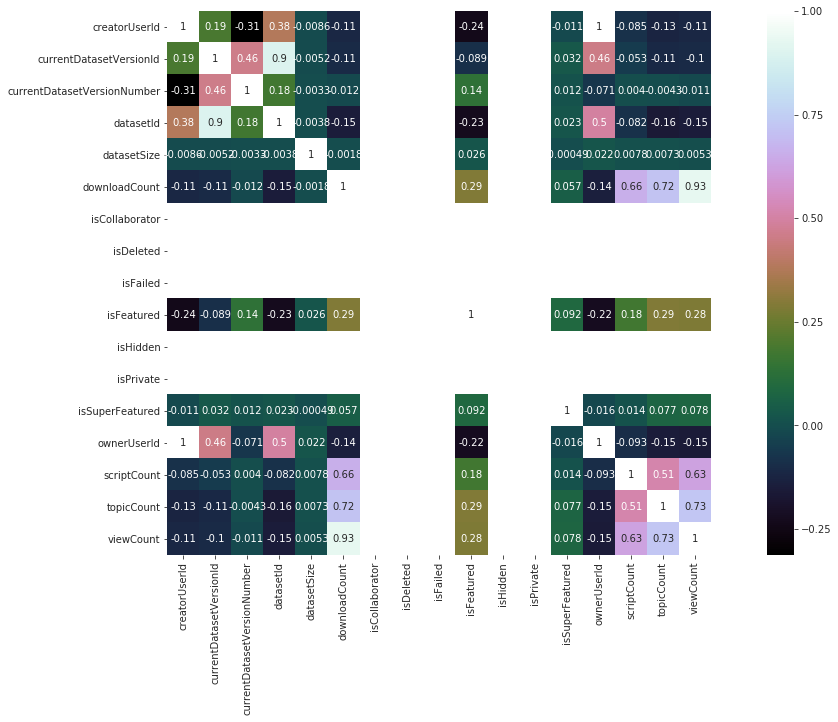

In [4]:
corr_mat = KD.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

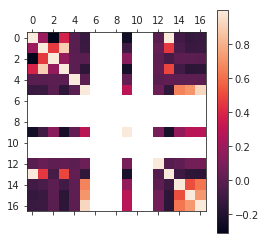

In [5]:
plt.matshow(KD.corr())
plt.colorbar()
plt.show()

In [6]:
_dfs = []
for datasetId, category_row in KD.set_index("datasetId")["categories"].iteritems():
    category_dict = eval(category_row)
    categories = category_dict["categories"]
    _df = pd.DataFrame(categories)
    _df["datasetId"] = datasetId 
    if category_dict["type"] != "dataset":
        print(category_dict["type"])
    _dfs.append(_df)
categories_df = pd.concat(_dfs, sort=False)

Text(0.5, 0, 'Categories')

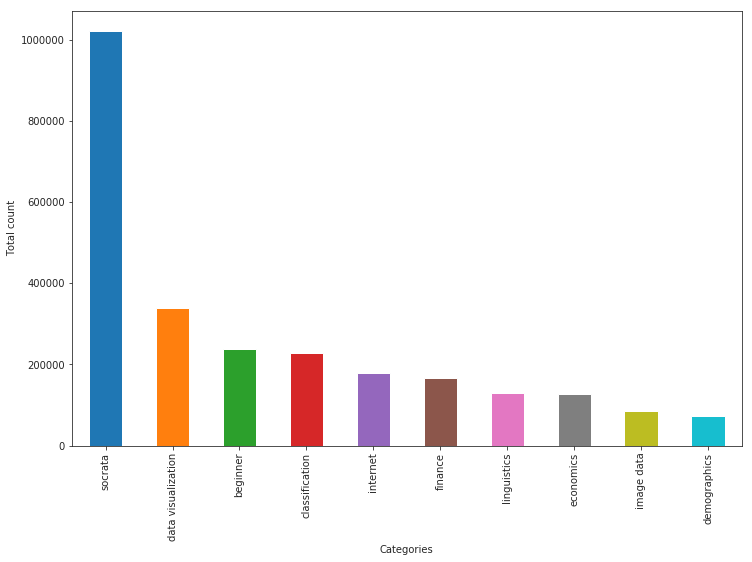

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
categories_df.groupby("name")["totalCount"].sum().nlargest(10).plot(kind='bar', ax=ax)
ax.set_ylabel("Total count")
ax.set_xlabel("Categories")

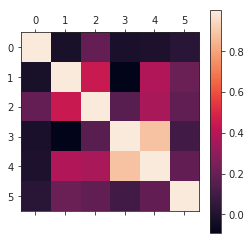

In [8]:
plt.matshow(categories_df .corr())
plt.colorbar()
plt.show()

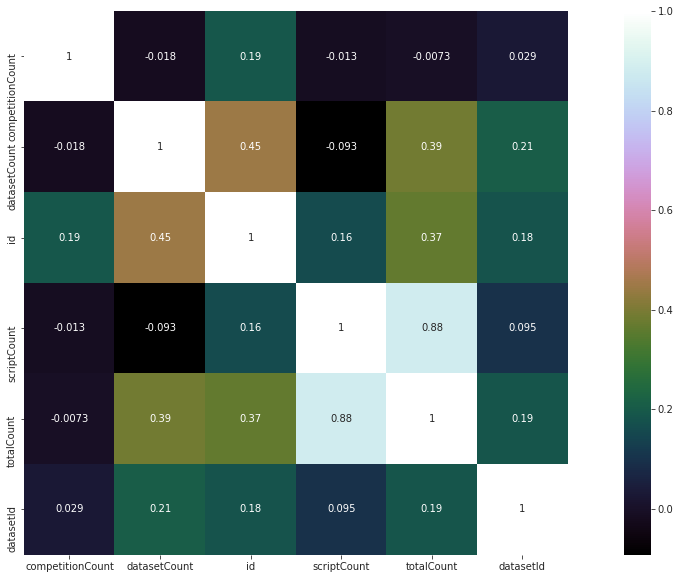

In [9]:
corr_mat = categories_df.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')